In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


# > **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# IMPORTING DATASET

In [3]:
df = pd.read_csv(r'/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# ****DESCRIPTION OF DATASET
Age : Age of the patient

Sex : Sex of the patient (male = 1, female = 0)

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

oldpeak- T depression induced by exercise relative to rest slp - of the peak exercise ST segment (Ordinal) [ 1: upsloping, 2: flat , 3: downsloping)

rest_ecg : resting electrocardiographic results [values 0,1,2]

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved(Ordinal) [3 = normal; 6 = fixed defect; 7 = reversable defect]

**target : 0= less chance of heart attack 1= more chance of heart attack')**

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

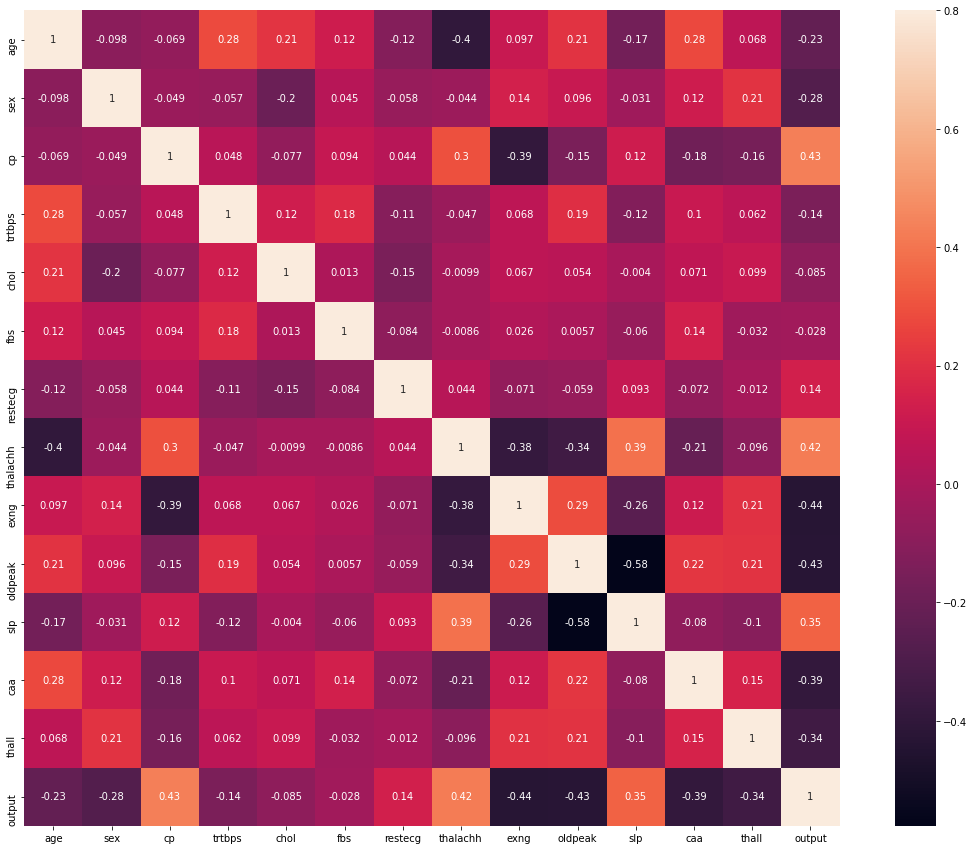

In [4]:
#HEAT MAP CORRELATION
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

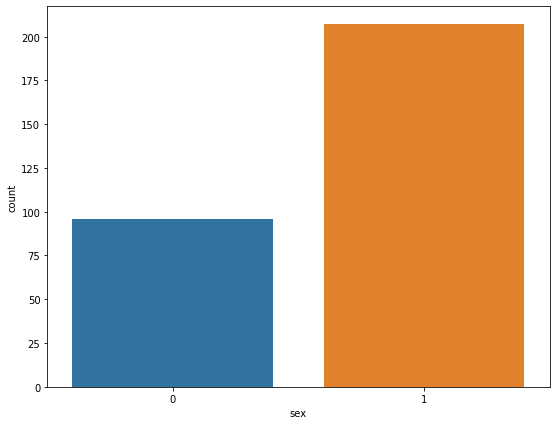

In [5]:
#count plot genders
f = plt.subplots(figsize = (9 , 7))
sns.countplot(data = df, x = "sex")
plt.show()

#here 0 - female 
# 1 - male 
#The number of males are more than female


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

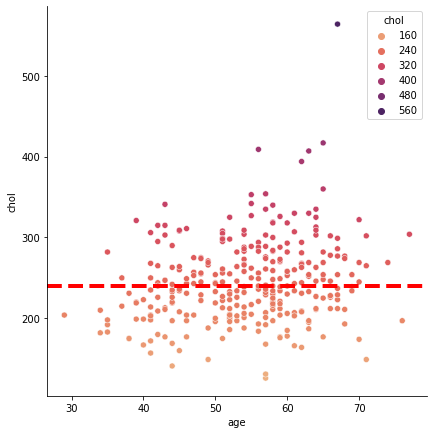

In [6]:
#cholestrol by age
plt.figure(figsize = (9,9))
sns.FacetGrid(df, size = 6)
v = sns.scatterplot(data = df , x = 'age', y = 'chol', hue = 'chol',palette = "flare")
v.axhline(y= 240, linewidth=4, color='r', linestyle= '--')
plt.show()  

****IN THIS ABOVE GRAPH, range above 240 mg/dl is considered as high which can lead to heart disease ****

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

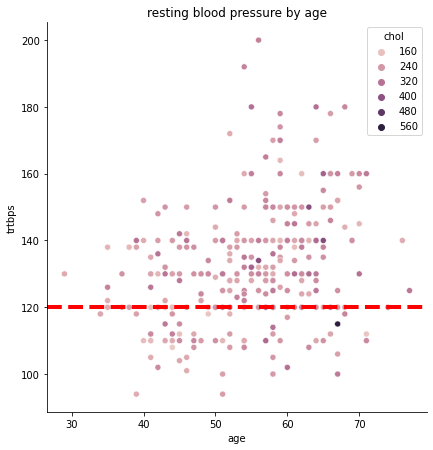

In [7]:
#resting blood pressure by age
plt.figure(figsize = (9,9))
sns.FacetGrid(df, size = 6)
v = sns.scatterplot(data = df , x = 'age', y = 'trtbps', hue = 'chol')
v.axhline(y= 120, linewidth=4, color='r', linestyle= '--')
plt.title("resting blood pressure by age")
plt.show()

**RESTING BLOOD PRESSURE HIGHER THAN 120 mmhg CAN LEAD TO HEART ATTACK**

<Figure size 864x720 with 0 Axes>

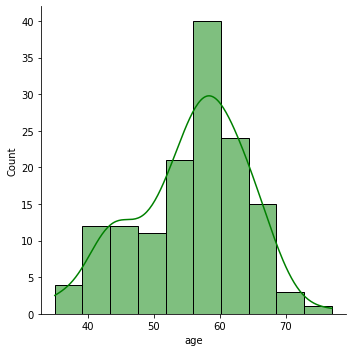

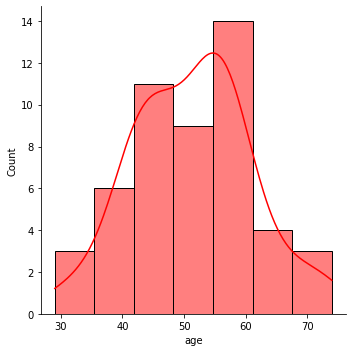

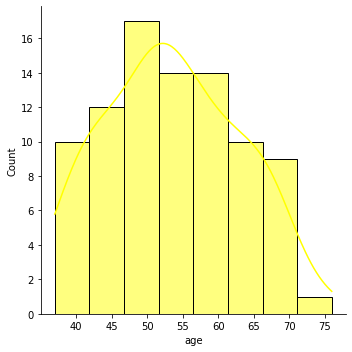

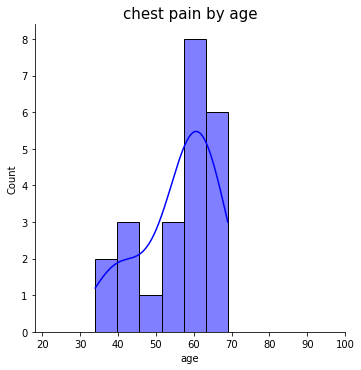

In [8]:
#chest pain by age
plt.figure(figsize=(12,10))

sns.displot(df[df['cp'] == 0]["age"], color='green', kde = True) # typical
sns.displot(df[df['cp'] == 1]["age"], color='red', kde = True) # atypical
sns.displot(df[df['cp'] == 2]["age"], color='yellow', kde = True) #non angina
sns.displot(df[df['cp'] == 3]["age"], color='blue', kde = True) # asymptotic resting blood pressure


plt.title('chest pain by age', fontsize=15)
plt.xlim([18,100])
plt.show()  

**1] 0 - typical angina value, which is due to physical exertion or emotional released by rest**

**2] 1 - atypical angina value, which is not associated with chest pain, symptoms are weakness, nausea, sweating**

**3] 2 - non angina value**

**4] 3- asymptotic resting blood pressure representing the BP reached after a long rest.**

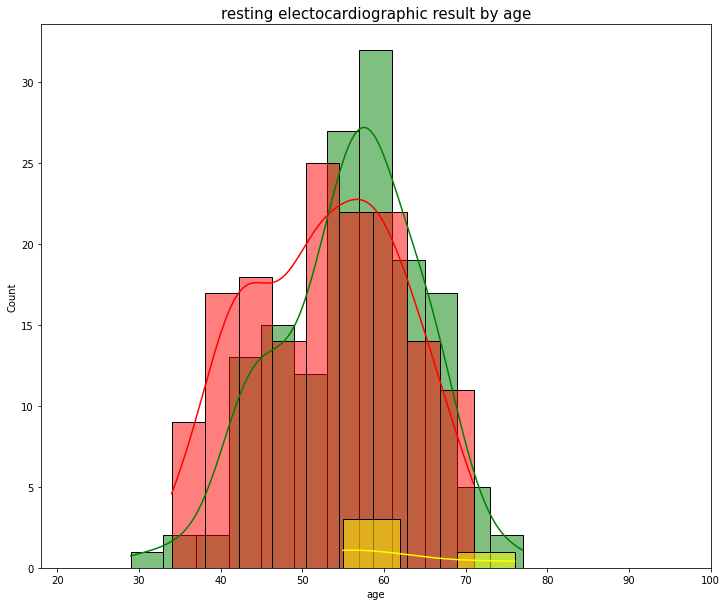

In [9]:
plt.figure(figsize=(12,10))

sns.histplot(df[df['restecg'] == 0]["age"], color='green', kde = True) # normal value  - green
sns.histplot(df[df['restecg'] == 1]["age"], color='red', kde = True) # having ST-T abnormality- Red
sns.histplot(df[df['restecg'] == 2]["age"], color='yellow', kde = True) # showing probable or definite left ventricular hypertrophy- yellow


plt.title('resting electocardiographic result by age', fontsize=15)
plt.xlim([18,100])
plt.show()

**1 ] Value 0 : normal (color - Green) SHOWS FROM AGE ABOVE 29**

**2 ] Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (color - red) SHOWS FROM AGE ABOVE 35**

**3 ] Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (color - Yellow) SHOWS AGE FROM 55 TO 63 AND 69 TO 75**

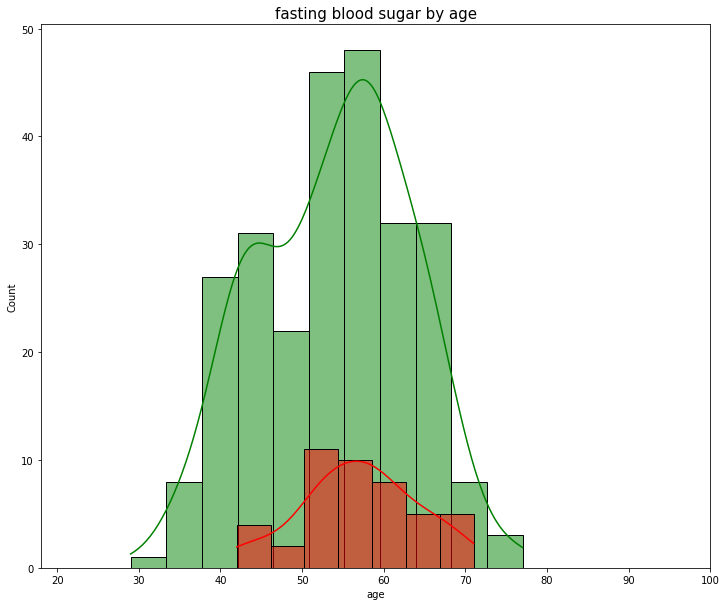

In [10]:
plt.figure(figsize=(12,10))

sns.histplot(df[df['fbs']== 0]["age"], color='green', kde = True) # FASTING BLOOD < 120
sns.histplot(df[df['fbs']== 1]["age"], color='red', kde = True) # FASTING BLOOD > 120

plt.title('fasting blood sugar by age', fontsize=15)
plt.xlim([18,100])
plt.show()

**In the above graph, age above 42 have chances of diabetis**

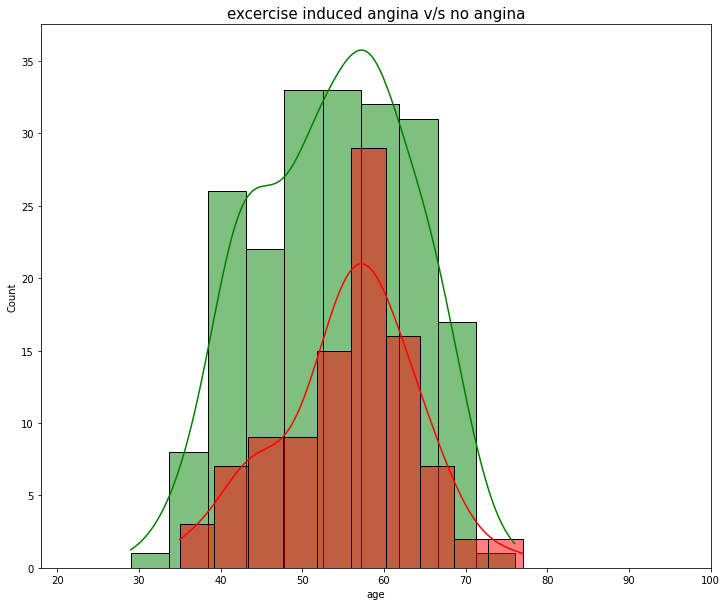

In [11]:
plt.figure(figsize=(12,10))

sns.histplot(df[df['exng'] == 0]["age"], color='green',kde = True) # no angina induced- green
sns.histplot(df[df['exng'] == 1]["age"], color='red', kde = True) # angina induced due to excercise- Red

plt.title('excercise induced angina v/s no angina', fontsize=15)
plt.xlim([18,100])
plt.show()

**In the above graph we can see that, the density above 35 age has caused angina due to excercise.**

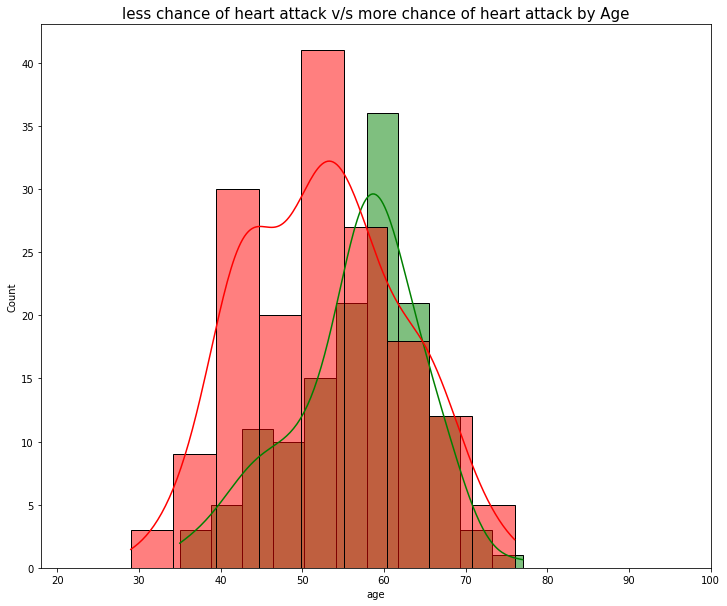

In [12]:
plt.figure(figsize=(12,10))

sns.histplot(df[df['output'] == 0]["age"], color='green', kde = True) # less chance of heart attack- green
sns.histplot(df[df['output'] == 1]["age"], color='red', kde=  True) # more chance of heart attack- Red

plt.title('less chance of heart attack v/s more chance of heart attack by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

# DATA PREPROCESSING

In [13]:
#features and label
x = df.iloc[:, :-1 ]
y = df.iloc[:,-1]


In [14]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [15]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scal = ['age', 'restecg', 'chol', 'thalachh', 'oldpeak']
#scaler.fit_transform(df[scal])
scaler.fit_transform(x_train)

array([[-1.32773282, -1.43641607,  0.98584243, ..., -0.66169316,
        -0.70710678, -0.46472917],
       [ 1.24903178, -1.43641607,  0.98584243, ..., -0.66169316,
         0.26516504, -0.46472917],
       [ 0.35276583,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       ...,
       [ 0.12869935,  0.69617712,  1.94013791, ..., -0.66169316,
        -0.70710678,  1.14190596],
       [-0.87959984,  0.69617712,  0.98584243, ...,  0.95577901,
        -0.70710678, -0.46472917],
       [ 0.35276583,  0.69617712,  0.03154696, ..., -0.66169316,
        -0.70710678, -0.46472917]])

# MODEL SELECTION
* logistic regression
* knn
* svm
* decision tree
* random forest
* naive bayes

In [16]:
#importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [17]:
#logistic regression
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x_train, y_train)
m1_pred = m1.predict(x_test)
acc = accuracy_score(y_test,m1_pred )
recall =recall_score(y_test,m1_pred )
precision = precision_score(y_test,m1_pred )
f1  = f1_score(y_test,m1_pred )
roc_curve = roc_auc_score(y_test,m1_pred )
conf = confusion_matrix(y_test, m1_pred)
print("Logistic Regression: ", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("*"*30)
print("\n")

#knn
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier()
m2.fit(x_train, y_train)

m2_pred = m2.predict(x_test)
acc = accuracy_score(y_test,m2_pred )
recall =recall_score(y_test,m2_pred )
precision = precision_score(y_test,m2_pred )
f1  = f1_score(y_test,m2_pred )
roc_curve = roc_auc_score(y_test,m2_pred )
conf = confusion_matrix(y_test, m2_pred)

print("KNN : ", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("*"*30)
print("\n")



#svm
from sklearn.svm import SVC
m3= SVC()
m3.fit(x_train, y_train)
m3_pred = m3.predict(x_test)
acc = accuracy_score(y_test,m3_pred )
recall =recall_score(y_test,m3_pred )
precision = precision_score(y_test,m3_pred )
f1  = f1_score(y_test,m3_pred )
roc_curve = roc_auc_score(y_test,m3_pred )
conf = confusion_matrix(y_test, m3_pred)

print("SVC: ", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("*"*30)
print("\n")



#decision tree
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier()
m4.fit(x_train, y_train)
m4_pred = m4.predict(x_test)
acc = accuracy_score(y_test, m4_pred)
recall =recall_score(y_test,m4_pred )
precision = precision_score(y_test,m4_pred )
f1  = f1_score(y_test,m4_pred )
roc_curve = roc_auc_score(y_test,m4_pred )
conf = confusion_matrix(y_test, m4_pred)

print("decision tree", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("*"*30)
print("\n")

#random forest
from sklearn.ensemble import RandomForestClassifier
m5 =RandomForestClassifier(n_estimators=100, random_state = 0)
m5.fit(x_train, y_train)
m5_pred = m5.predict(x_test)
acc = accuracy_score(y_test, m5_pred)
recall =recall_score(y_test,m5_pred )
precision = precision_score(y_test,m5_pred )
f1  = f1_score(y_test,m5_pred )
roc_curve = roc_auc_score(y_test,m5_pred )
conf = confusion_matrix(y_test, m5_pred)

print("Random forest: ", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("*"*30)
print("\n")




#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
m6 = GaussianNB()
m6.fit(x_train, y_train)
m6_pred = m6.predict(x_test)
acc = accuracy_score(y_test, m6_pred)
recall =recall_score(y_test,m6_pred )
precision = precision_score(y_test,m6_pred )
f1  = f1_score(y_test,m6_pred )
roc_curve = roc_auc_score(y_test,m6_pred )
conf = confusion_matrix(y_test, m6_pred)

print("Gaussian model: ", "\n")
print("confusion matrix : ", conf)
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("-"*30)
print("\n")



m7 = BernoulliNB()
m7.fit(x_train, y_train)
m7_pred = m7.predict(x_test)
recall =recall_score(y_test,m7_pred )
precision = precision_score(y_test,m7_pred )
f1  = f1_score(y_test,m7_pred )
acc = accuracy_score(y_test, m7_pred)
roc_curve = roc_auc_score(y_test,m7_pred )
conf = confusion_matrix(y_test, m7_pred)

print("bernoulli model: ", "\n")
print("confusion matrix : ", conf)  
print("Accuracy: ", acc)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("-"*30)

Logistic Regression:  

confusion matrix :  [[22  5]
 [ 4 30]]
Accuracy:  0.8524590163934426
recall: 0.8823529411764706
precision score :  0.8571428571428571
f score:  0.8695652173913043
roc_auc_score:  0.8485838779956427
******************************


KNN :  

confusion matrix :  [[17 10]
 [12 22]]
Accuracy:  0.639344262295082
recall: 0.6470588235294118
precision score :  0.6875
f score:  0.6666666666666667
roc_auc_score:  0.6383442265795207
******************************




/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC:  

confusion matrix :  [[13 14]
 [ 5 29]]
Accuracy:  0.6885245901639344
recall: 0.8529411764705882
precision score :  0.6744186046511628
f score:  0.7532467532467532
roc_auc_score:  0.6672113289760349
******************************


decision tree 

confusion matrix :  [[21  6]
 [ 8 26]]
Accuracy:  0.7704918032786885
recall: 0.7647058823529411
precision score :  0.8125
f score:  0.787878787878788
roc_auc_score:  0.7712418300653595
******************************


Random forest:  

confusion matrix :  [[24  3]
 [ 4 30]]
Accuracy:  0.8852459016393442
recall: 0.8823529411764706
precision score :  0.9090909090909091
f score:  0.8955223880597014
roc_auc_score:  0.8856209150326797
******************************


Gaussian model:  

confusion matrix :  [[21  6]
 [ 3 31]]
Accuracy:  0.8524590163934426
recall: 0.9117647058823529
precision score :  0.8378378378378378
f score:  0.8732394366197184
roc_auc_score:  0.8447712418300652
------------------------------


bernoulli model:  

confusio

# TUNING THE MODEL
* using grid search
* finding the best accuracy

In [18]:
#m2 knn
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid2 = GridSearchCV(estimator = m2,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 15, 
                        verbose = 1,
                        )
grid2.fit(x_train, y_train)


best_acc = grid2.best_score_
best_param = grid2.best_params_
print("best parameters: ", best_param)
print("accuracy:", best_acc*100)

Fitting 15 folds for each of 16 candidates, totalling 240 fits
best parameters:  {'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'uniform'}
accuracy: 65.71078431372548


In [19]:
#m3 svm
params = {'C':[10, ],'kernel':['linear', 'rbf'],'random_state':[0]}
grid4 = GridSearchCV(estimator = m3, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid4.fit(x_train, y_train)
best_acc = grid4.best_score_
best_param = grid4.best_params_
print("best parameters: ", best_param)
print("accuracy:", best_acc*100)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
best parameters:  {'C': 10, 'kernel': 'linear', 'random_state': 0}
accuracy: 78.9625850340136


In [20]:
#m4 decision tree
params = {'criterion':['gini','entropy'],'random_state':[0]}
grid5 = GridSearchCV(estimator= m4, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid5.fit(x_train, y_train)

best_acc = grid5.best_score_
best_param = grid5.best_params_
print("best parameters: ", best_param)
print("accuracy: ", best_acc*100)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
best parameters:  {'criterion': 'gini', 'random_state': 0}
accuracy:  75.22108843537414


In [21]:
#m5 random forest
params = {'n_estimators':[100, 200, 300],'criterion':['gini','entropy'],'random_state':[0]}
grid3 = GridSearchCV(estimator = m5, param_grid = params, scoring = "accuracy", cv = 10, verbose = 1)
grid3.fit(x_train, y_train)
best_acc = grid3.best_score_
best_param = grid3.best_params_
print("best parameters: ", best_param)
print("accuracy: ", best_acc*100)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
best parameters:  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}
accuracy:  84.74999999999999


In [22]:
#m6 gaaussain nb
params = {'var_smoothing': [1e-09]}
grid6 = GridSearchCV(estimator = m6, param_grid = params, scoring = 'accuracy' , cv = 5, verbose = 1)
grid6.fit(x_train, y_train)
best_param = grid6.best_params_
best_acc = grid6.best_score_
print("Accuracy: ", best_acc*100)
print("best parameters: ", best_param)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy:  81.03741496598639
best parameters:  {'var_smoothing': 1e-09}


In [23]:
#m7 bernouilli nb
params = {'alpha': [0.25, 0.5, 1]}
grid7 = GridSearchCV(estimator = m7, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 1)
grid7.fit(x_train, y_train)

best_param = grid7.best_params_
best_acc = grid7.best_score_
print("accuracy:", best_acc*100)
print("best parameters: ", best_param)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
accuracy: 82.26666666666667
best parameters:  {'alpha': 0.5}


In [24]:
#fitting random forest
m5 =RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 0)
m5.fit(x_train, y_train)
m5_pred = m5.predict(x_test)
acc = accuracy_score(y_test, m5_pred)
recall =recall_score(y_test,m5_pred )
precision = precision_score(y_test,m5_pred )
f1  = f1_score(y_test,m5_pred )
roc_curve = roc_auc_score(y_test,m5_pred )
conf = confusion_matrix(y_test, m5_pred)
print("Random forest")
print("Accuracy: ", acc*100)
print("recall:", recall)
print("precision score : ", precision)
print("f score: ", f1)
print("roc_auc_score: ", roc_curve)
print("confusion matrix: ", conf)
print("*"*30)
print("\n")

Random forest
Accuracy:  88.52459016393442
recall: 0.8823529411764706
precision score :  0.9090909090909091
f score:  0.8955223880597014
roc_auc_score:  0.8856209150326797
confusion matrix:  [[24  3]
 [ 4 30]]
******************************




Confusion Matrix:
 [[24  3]
 [ 4 30]]
Accuracy: 88.52459016393442


/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:255: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


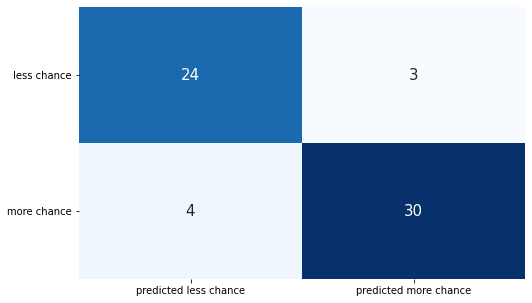

In [25]:
 #Making the Confusion Matrix
cm = confusion_matrix(y_test, m5_pred)
print('Confusion Matrix:\n',cm)

# Calculate the Accuracy
accuracy = accuracy_score(y_test, m5_pred)
print('Accuracy:', accuracy*100)

#Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues',annot = True, annot_kws= {'Fontsize': 15},cbar = False,  yticklabels = ["less chance", "more chance"], xticklabels = ['predicted less chance', 'predicted more chance'])
plt.yticks(rotation= 0)
plt.show()

> Therefore, after tuning the hyperparameters with the help of GridSearch to get models. After that, I came to conclusion that **RandomForestClassifier** is best model for this dataset.